In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
import os

In [75]:
df = pd.read_csv("Bank_Marketing.csv")

In [79]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Checking for missing data

In [59]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Descriptions of Sample and Features

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [68]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [80]:
# create list of numric and categorical column
num_cols=[]
cat_cols=[]
for i in df.columns:
    if df[i].dtype=='int64' or df[i].dtype=='float64':
        num_cols.append(i)
    elif df[i].dtype=='object':
        cat_cols.append(i)
print("NUMERIC COLS:{0}".format(num_cols))
print("CATEGORICAL COLS:{0}".format(cat_cols))

NUMERIC COLS:['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
CATEGORICAL COLS:['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


# STATISTCS

In [7]:
df.mean()

age                 40.024060
duration           258.285010
campaign             2.567593
pdays              962.475454
previous             0.172963
emp.var.rate         0.081886
cons.price.idx      93.575664
cons.conf.idx      -40.502600
euribor3m            3.621291
nr.employed       5167.035911
dtype: float64

In [9]:
df.max()

age                      98
job                 unknown
marital             unknown
education           unknown
default                 yes
housing                 yes
loan                    yes
contact           telephone
month                   sep
day_of_week             wed
duration               4918
campaign                 56
pdays                   999
previous                  7
poutcome            success
emp.var.rate            1.4
cons.price.idx       94.767
cons.conf.idx         -26.9
euribor3m             5.045
nr.employed          5228.1
y                       yes
dtype: object

In [10]:
df.min()

age                     17
job                 admin.
marital           divorced
education         basic.4y
default                 no
housing                 no
loan                    no
contact           cellular
month                  apr
day_of_week            fri
duration                 0
campaign                 1
pdays                    0
previous                 0
poutcome           failure
emp.var.rate          -3.4
cons.price.idx      92.201
cons.conf.idx        -50.8
euribor3m            0.634
nr.employed         4963.6
y                       no
dtype: object

# Exploratory Data Analysis

In [81]:
#checking unique value in each cat cols
print("UNIQUE VALUES IN CATEGORICAL COLUMNS ARE:\n")
for i in cat_cols:
    print(f'{i.upper()}:{df[i].unique()}\n')

UNIQUE VALUES IN CATEGORICAL COLUMNS ARE:

JOB:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

MARITAL:['married' 'single' 'divorced' 'unknown']

EDUCATION:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

DEFAULT:['no' 'unknown' 'yes']

HOUSING:['no' 'yes' 'unknown']

LOAN:['no' 'yes' 'unknown']

CONTACT:['telephone' 'cellular']

MONTH:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

DAY_OF_WEEK:['mon' 'tue' 'wed' 'thu' 'fri']

POUTCOME:['nonexistent' 'failure' 'success']

Y:['no' 'yes']



# Correlations

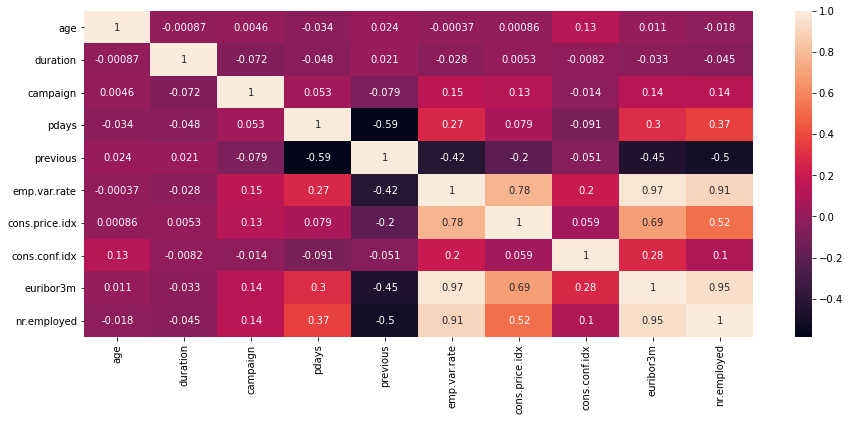

In [12]:
#corr matrix plot through heatmap
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

<!-- with the help of above corr heatmap we can clearly see that DURATRION feature is useless because it is less correlated with bany other feature  -->

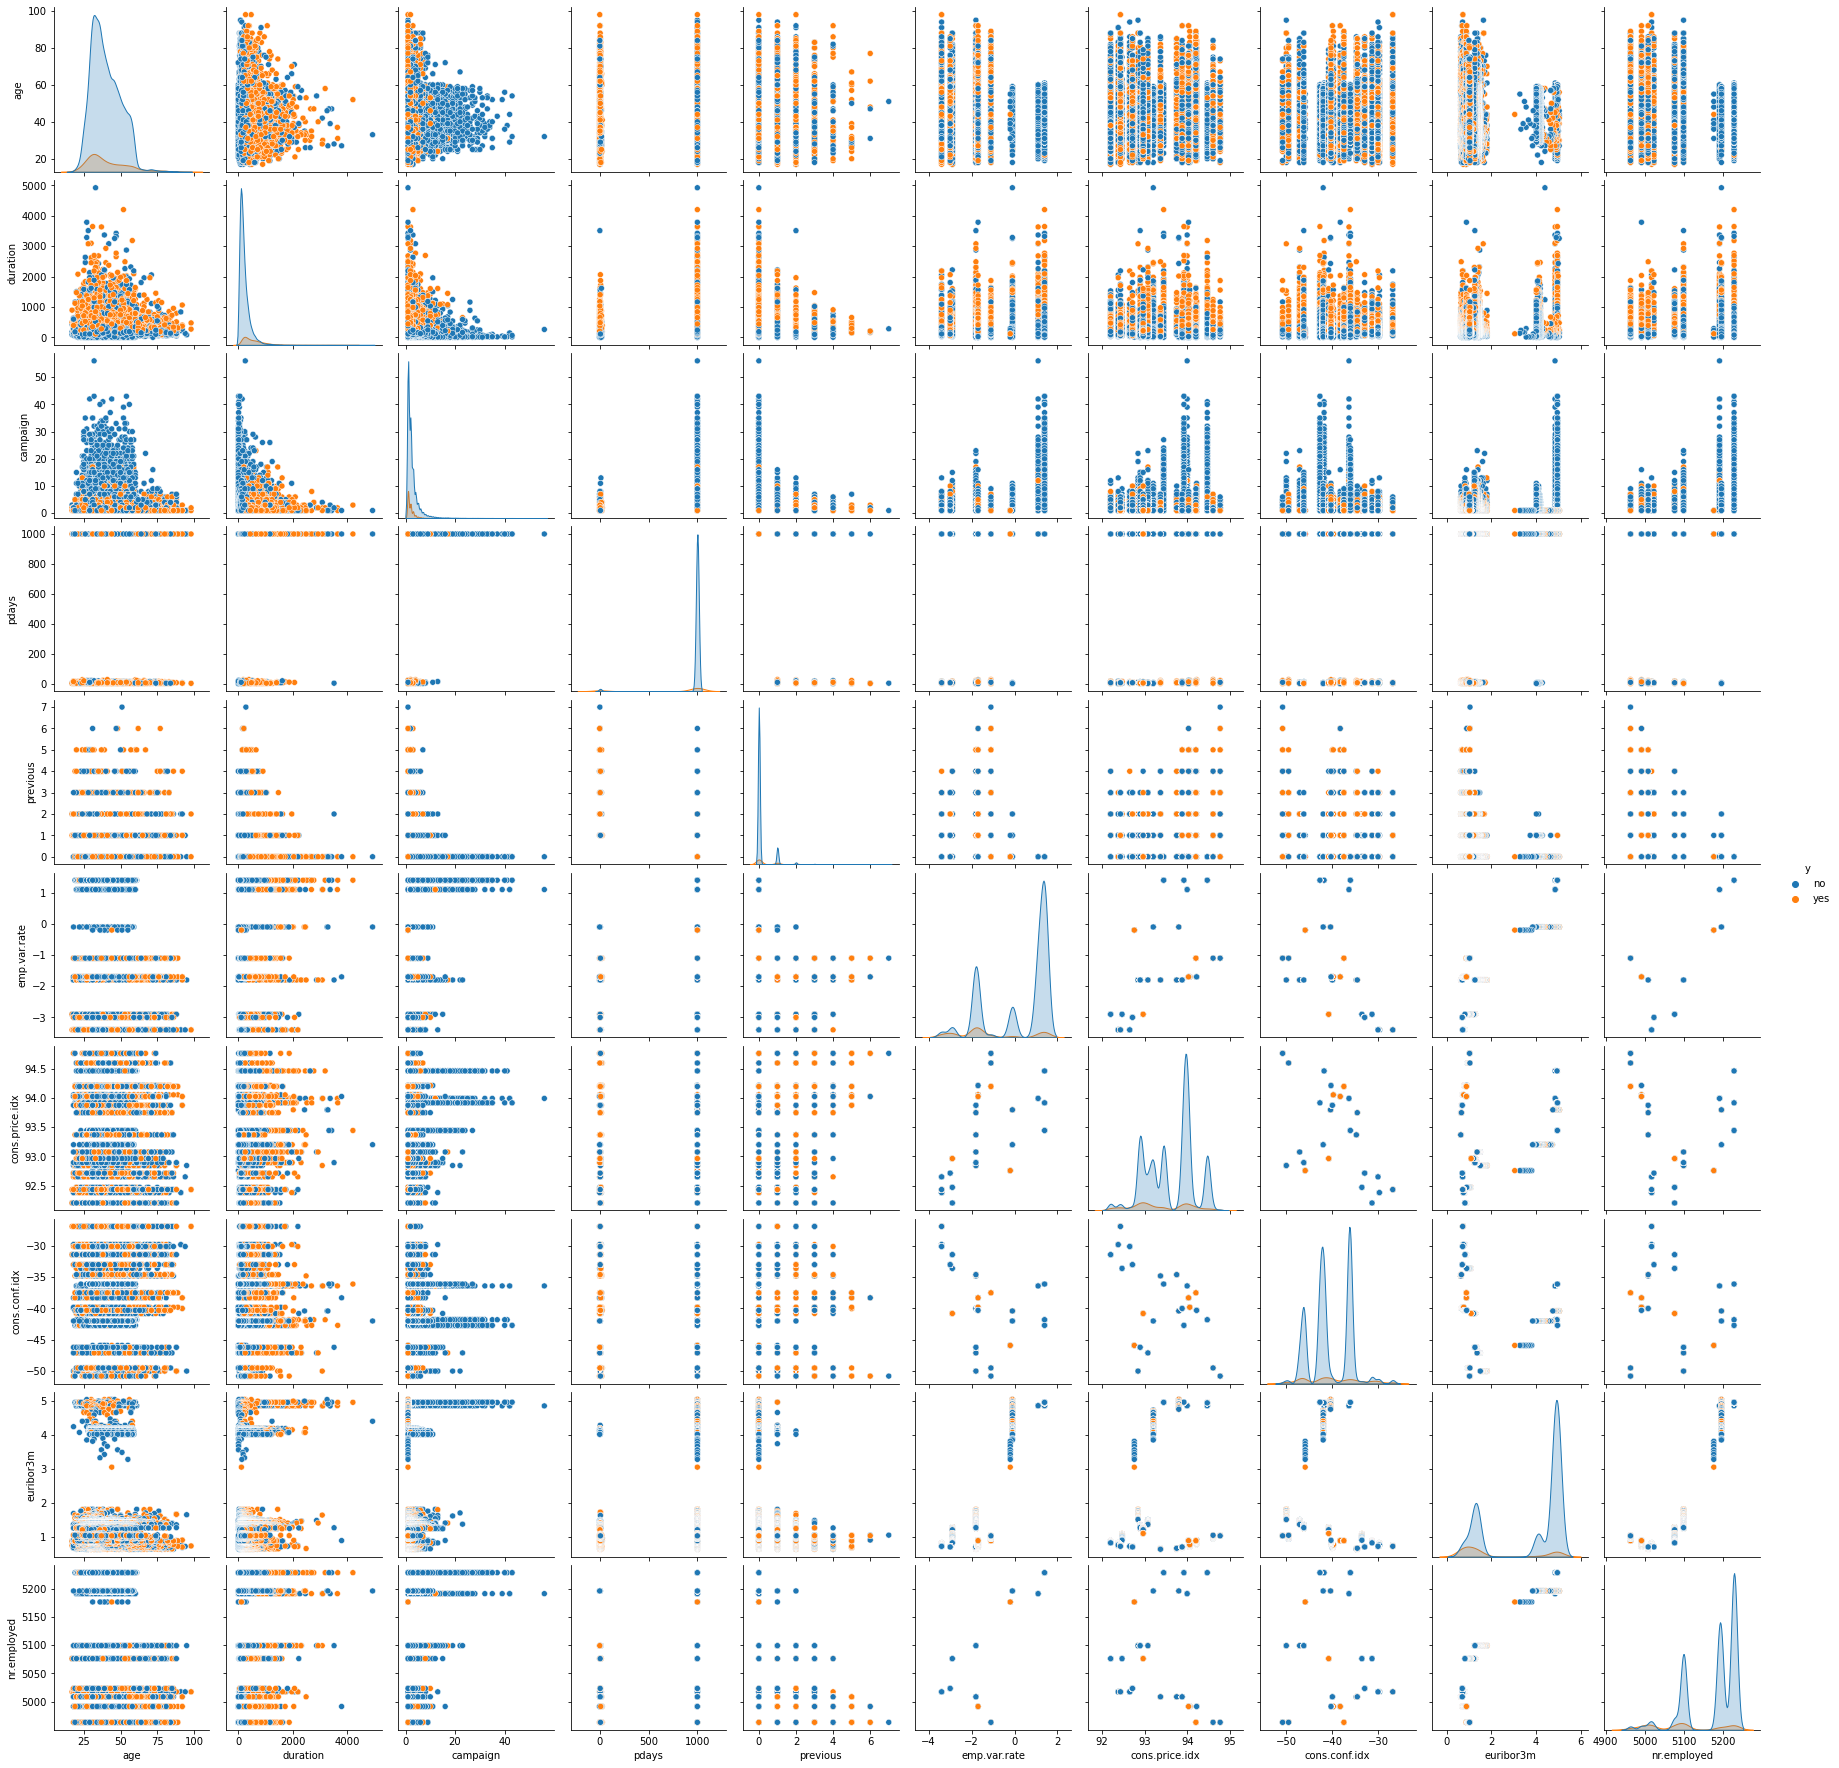

In [87]:
sns.pairplot(data=df,hue='y')
plt.show()

In [6]:
#checking unique value in each cat cols
print("UNIQUE VALUES IN CATEGORICAL COLUMNS ARE:\n")
for i in cat_cols:
    print(f'{i.upper()}:{df[i].unique()}\n')

UNIQUE VALUES IN CATEGORICAL COLUMNS ARE:

JOB:['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

MARITAL:['married' 'single' 'divorced' 'unknown']

EDUCATION:['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

DEFAULT:['no' 'unknown' 'yes']

HOUSING:['no' 'yes' 'unknown']

LOAN:['no' 'yes' 'unknown']

CONTACT:['telephone' 'cellular']

MONTH:['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

DAY_OF_WEEK:['mon' 'tue' 'wed' 'thu' 'fri']

POUTCOME:['nonexistent' 'failure' 'success']

Y:['no' 'yes']



DISTRIBUTION PLOTS FOR NUMRICAL COLUMNS:



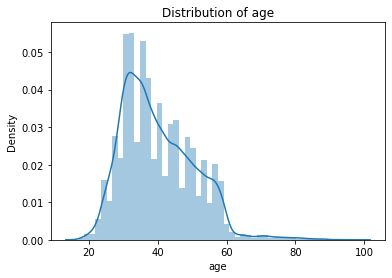

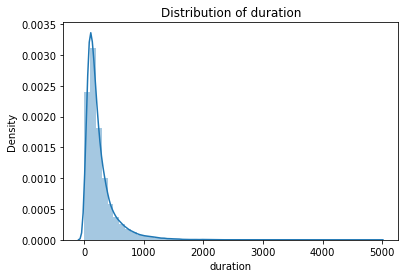

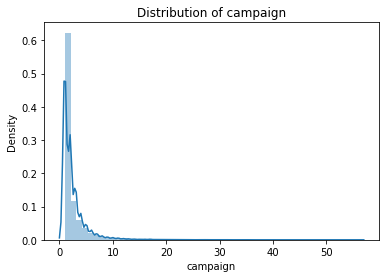

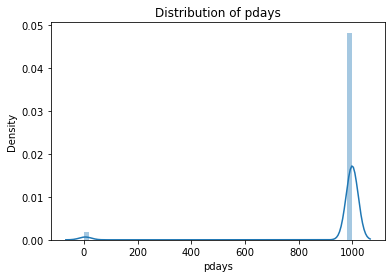

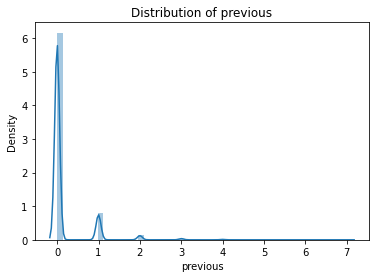

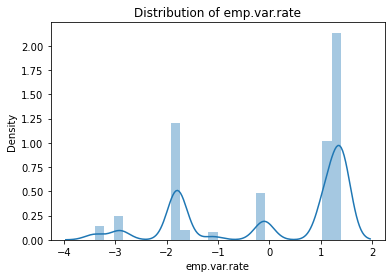

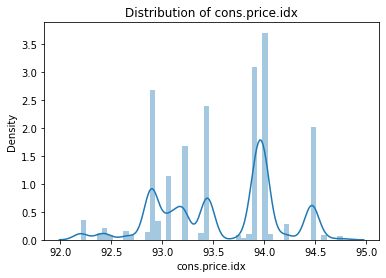

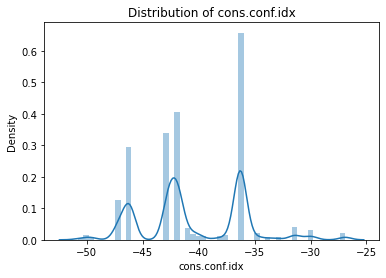

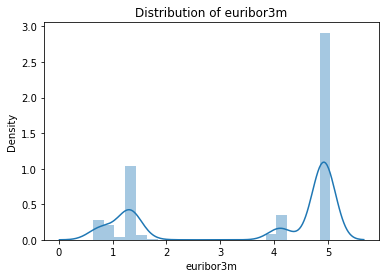

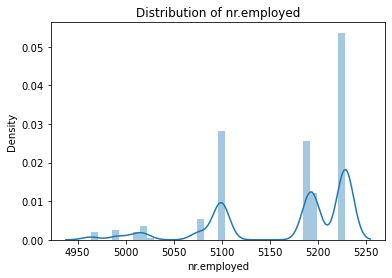

In [88]:
#checking unique value in each num cols

print("DISTRIBUTION PLOTS FOR NUMRICAL COLUMNS:\n")
for i in num_cols:
    sns.distplot(df[i])
#     sns.boxplot(df[i])
    plt.title(f'Distribution of {i}')
    plt.show()

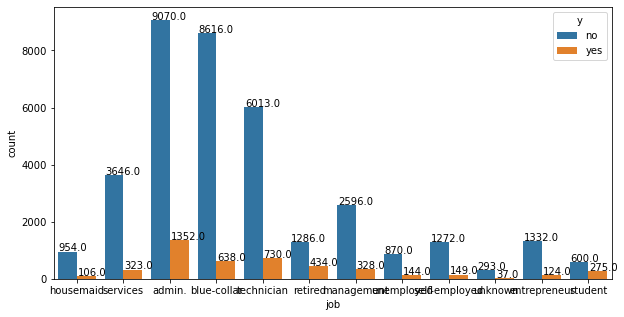

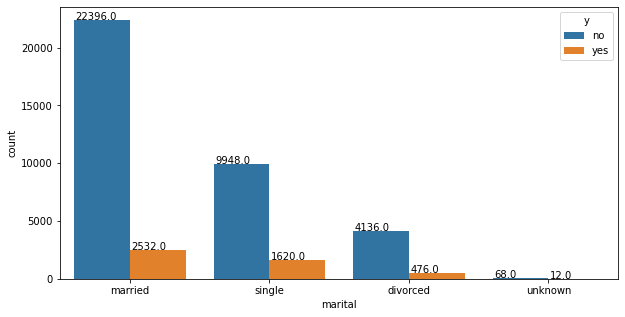

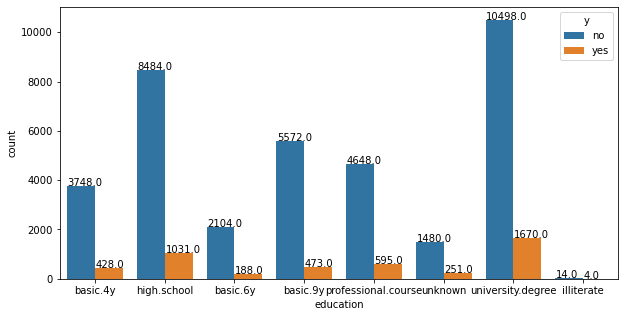

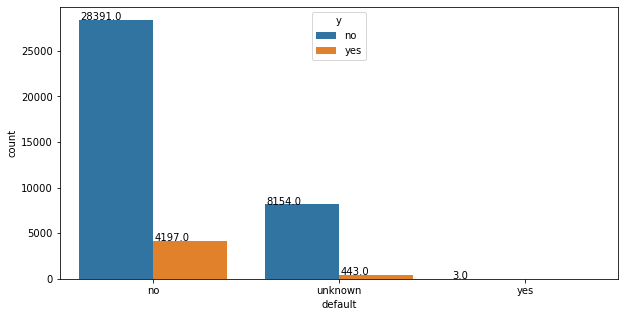

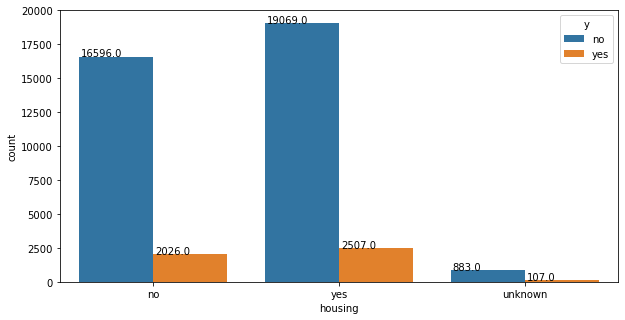

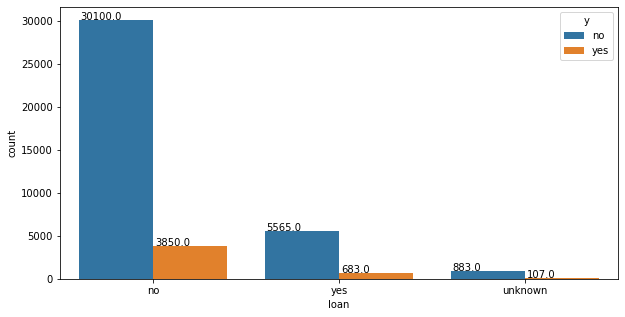

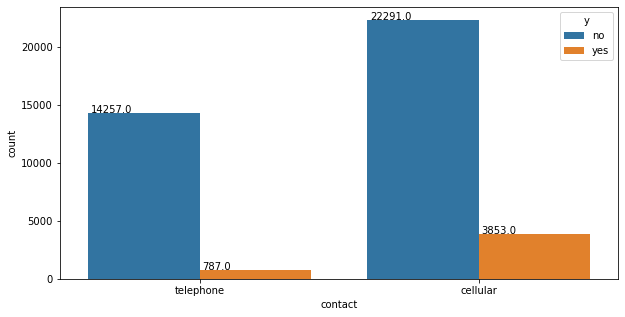

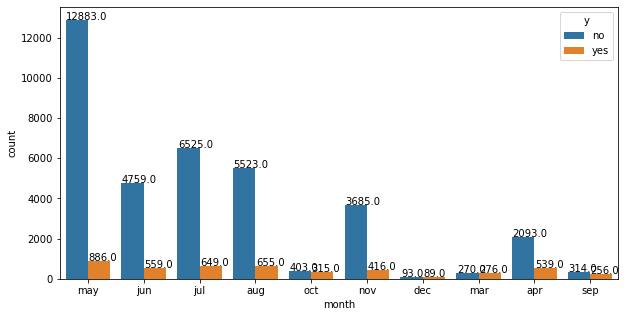

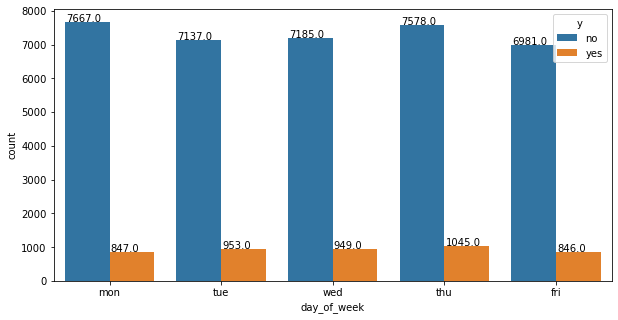

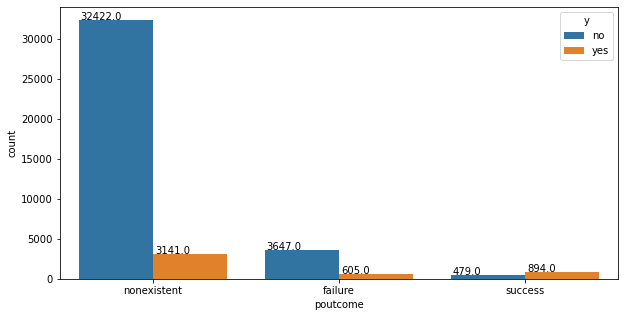

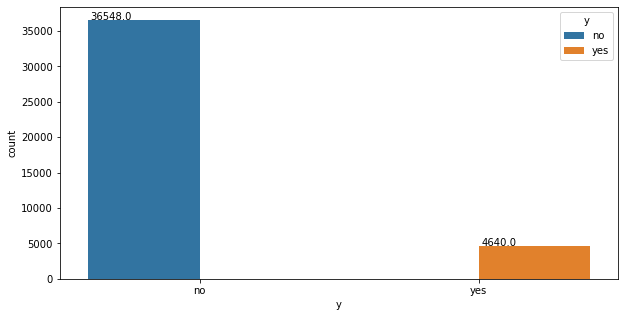

In [35]:
#seeing the realtioship of numric variables with reposnse variable
def categorcal_columns(cat_cols):
    for i in cat_cols:
        plt.figure(figsize=[10,5])
        ax=sns.countplot(df[i],hue=df["y"])
        
        for p in ax.patches:
            ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+10))
plt.show()
categorcal_columns(cat_cols)


from above plots I can draw some points like
* admin,blue-collar, technicians have highest marketing 
* same happed with married, married people highest marketing
* people with university degree have highest marketing count 
* people who already have loan has highest reach and higest approval("yes")
* And more marketing is happening for non existing coustmers

In [12]:
def numeric_cols(num_cols):
    for i in num_cols:
        print("{0}\t".format(i),df.groupby('y')[i].mean(),"\n\n")
        
numeric_cols(num_cols)

age	 y
no     39.911185
yes    40.913147
Name: age, dtype: float64 


duration	 y
no     220.844807
yes    553.191164
Name: duration, dtype: float64 


campaign	 y
no     2.633085
yes    2.051724
Name: campaign, dtype: float64 


pdays	 y
no     984.113878
yes    792.035560
Name: pdays, dtype: float64 


previous	 y
no     0.132374
yes    0.492672
Name: previous, dtype: float64 




In [13]:
print("Total number of poeple who opened tearm deposit: {0}".format(len(df.y[df.y=='yes'])))
print("Total number of poeple who did not opened tearm deposit: {0}".format(len(df.y[df.y=='no'])))

Total number of poeple who opened tearm deposit: 4640
Total number of poeple who did not opened tearm deposit: 36548


# Outliers

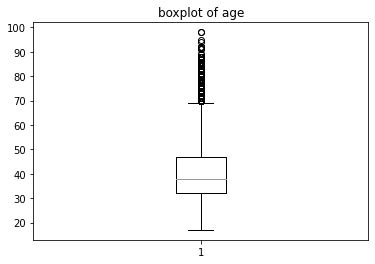

<Figure size 720x504 with 0 Axes>

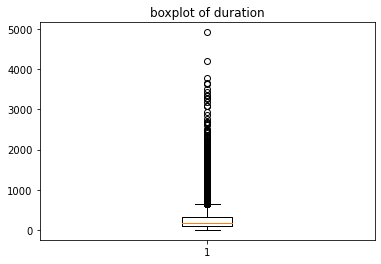

<Figure size 720x504 with 0 Axes>

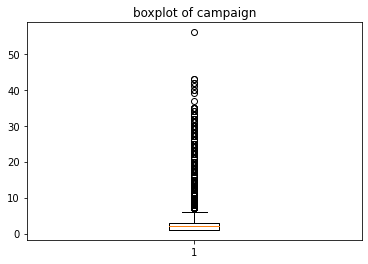

<Figure size 720x504 with 0 Axes>

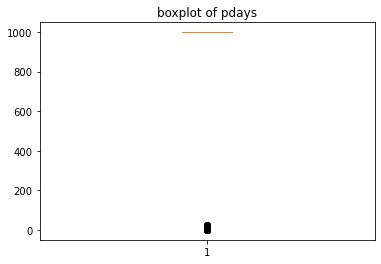

<Figure size 720x504 with 0 Axes>

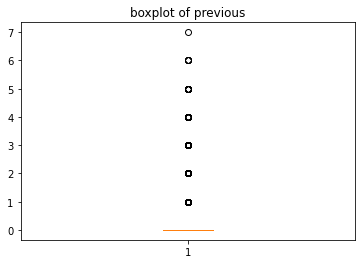

<Figure size 720x504 with 0 Axes>

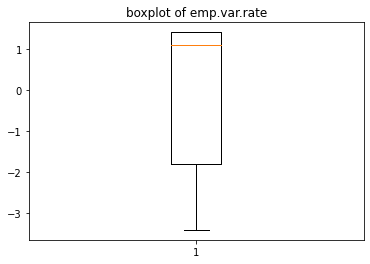

<Figure size 720x504 with 0 Axes>

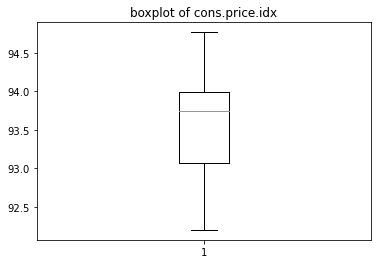

<Figure size 720x504 with 0 Axes>

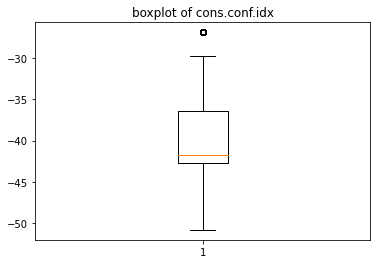

<Figure size 720x504 with 0 Axes>

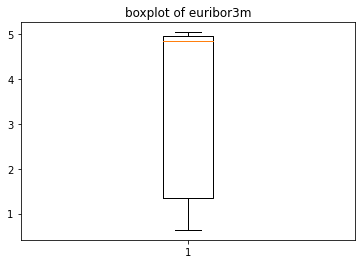

<Figure size 720x504 with 0 Axes>

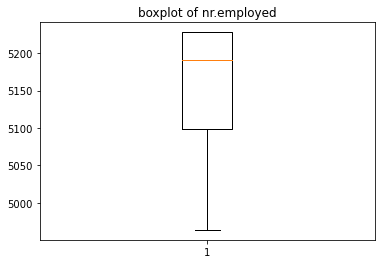

<Figure size 720x504 with 0 Axes>

In [92]:
for i in num_cols:
    plt.boxplot(df[i])
    plt.title(f'boxplot of {i}')
    fig = plt.figure(figsize =(10, 7))
    plt.show()

In [ ]:
# with above box plot for every feature some features like PREVIOUS,PDAYS have limited amout of data and mostly catogotical data

In [83]:
import scipy.stats as stats

stats.f_oneway(df['y'] == 'yes',df['y'] == 'No')

F_onewayResult(statistic=5228.950421363685, pvalue=0.0)